<a href="https://colab.research.google.com/github/vinicfiav/Unsupervised_Machine_Learning/blob/main/03Hierarchical_ViniciusCordeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercício 1: Implementação do Average Linkage

Complete a implementação da nossa classe `HierarchicalClustering` adicionando o método **Average Linkage**. Em seguida, teste todos os três métodos de ligação (single, complete, average) no dataset simples (`X_simple`) e compare os resultados.

In [1]:
# Célula de importação de bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import fcluster
from scipy.stats import mode

# Estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

In [3]:
class HierarchicalClustering:
    def __init__(self, linkage='single'):
        """
        Inicializa o algoritmo de clusterização hierárquica.

        Parameters:
        linkage: str, critério de ligação ('single', 'complete', 'average')
        """
        self.linkage = linkage
        self.merge_history = []
        self.distances = []

    def _calculate_distance_matrix(self, X):
        """
        Calcula a matriz de distâncias entre todos os pares de pontos.
        """
        n = len(X)
        dist_matrix = np.zeros((n, n))

        for i in range(n):
            for j in range(i+1, n):
                dist = np.linalg.norm(X[i] - X[j])#euclidiana
                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist

        return dist_matrix

    def _cluster_distance(self, cluster1, cluster2, X, dist_matrix):
        """
        Calcula a distância entre dois clusters baseado no critério de ligação.
        """
        if self.linkage == 'single':
            # Distância mínima entre qualquer par de pontos dos clusters
            min_dist = float('inf')
            for i in cluster1:
                for j in cluster2:
                    if dist_matrix[i, j] < min_dist:
                        min_dist = dist_matrix[i, j]#qual ponto tem a distancia minima
            return min_dist

        elif self.linkage == 'complete':
            # Distância máxima entre qualquer par de pontos dos clusters
            max_dist = 0
            for i in cluster1:
                for j in cluster2:
                    if dist_matrix[i, j] > max_dist:
                        max_dist = dist_matrix[i, j]
            return max_dist

        elif self.linkage == 'average':
        # Distância média entre todos os pares de pontos dos clusters
        #soma da distancia de cada ponto sobre o numero de elementos de a * n de elementos de b
            avg_dist = 0
            cluster_size = len(cluster1) * len(cluster2)
            for i in cluster1:
              for j in cluster2:
                avg_dist += dist_matrix[i, j]/cluster_size
            return avg_dist
        # ...

    def fit(self, X):
        """
        Executa o algoritmo de clusterização hierárquica aglomerativa.
        """
        n = len(X)# qnt de elementos

        # Inicializar cada ponto como um cluster
        clusters = [[i] for i in range(n)]

        # Calcular matriz de distâncias inicial
        dist_matrix = self._calculate_distance_matrix(X)

        self.merge_history = []
        self.distances = []

        step = 0
        print(f"Passo inicial: {len(clusters)} clusters individuais")
        print(f"Clusters: {clusters}\n")

        # Continuar até que reste apenas um cluster
        while len(clusters) > 1:
            # Encontrar o par de clusters mais próximo/valor minimo de distancia
            min_distance = float('inf')
            merge_i, merge_j = -1, -1

            for i in range(len(clusters)):
                for j in range(i+1, len(clusters)):
                    distance = self._cluster_distance(clusters[i], clusters[j], X, dist_matrix)
                    if distance < min_distance:
                        min_distance = distance
                        merge_i, merge_j = i, j

            # Combinar os clusters mais próximos
            new_cluster = clusters[merge_i] + clusters[merge_j]

            # Salvar informações da fusão/history
            self.merge_history.append((clusters[merge_i].copy(), clusters[merge_j].copy()))
            self.distances.append(min_distance)

            step += 1
            print(f"Passo {step}: Combinar clusters {clusters[merge_i]} e {clusters[merge_j]}")
            print(f"Distância: {min_distance:.3f}")

            # Remover os clusters antigos e adicionar o novo
            clusters = [clusters[k] for k in range(len(clusters)) if k != merge_i and k != merge_j]
            clusters.append(new_cluster)

            print(f"Clusters restantes: {clusters}\n")

In [5]:
# Gerando dados sintéticos simples para demonstração
np.random.seed(42)
X_simple = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])


In [6]:
# Executar a clusterização hierárquica com ligação simples
hc_single = HierarchicalClustering(linkage='single')
hc_single.fit(X_simple)

Passo inicial: 6 clusters individuais
Clusters: [[0], [1], [2], [3], [4], [5]]

Passo 1: Combinar clusters [0] e [1]
Distância: 0.539
Clusters restantes: [[2], [3], [4], [5], [0, 1]]

Passo 2: Combinar clusters [4] e [0, 1]
Distância: 1.300
Clusters restantes: [[2], [3], [5], [4, 0, 1]]

Passo 3: Combinar clusters [2] e [3]
Distância: 3.000
Clusters restantes: [[5], [4, 0, 1], [2, 3]]

Passo 4: Combinar clusters [5] e [2, 3]
Distância: 3.162
Clusters restantes: [[4, 0, 1], [5, 2, 3]]

Passo 5: Combinar clusters [4, 0, 1] e [5, 2, 3]
Distância: 7.120
Clusters restantes: [[4, 0, 1, 5, 2, 3]]



In [7]:
# Executar a clusterização hierárquica com ligação simples
hc_complete = HierarchicalClustering(linkage='complete')
hc_complete.fit(X_simple)

Passo inicial: 6 clusters individuais
Clusters: [[0], [1], [2], [3], [4], [5]]

Passo 1: Combinar clusters [0] e [1]
Distância: 0.539
Clusters restantes: [[2], [3], [4], [5], [0, 1]]

Passo 2: Combinar clusters [4] e [0, 1]
Distância: 1.400
Clusters restantes: [[2], [3], [5], [4, 0, 1]]

Passo 3: Combinar clusters [2] e [3]
Distância: 3.000
Clusters restantes: [[5], [4, 0, 1], [2, 3]]

Passo 4: Combinar clusters [5] e [2, 3]
Distância: 5.000
Clusters restantes: [[4, 0, 1], [5, 2, 3]]

Passo 5: Combinar clusters [4, 0, 1] e [5, 2, 3]
Distância: 13.121
Clusters restantes: [[4, 0, 1, 5, 2, 3]]



In [8]:
# Executar a clusterização hierárquica com ligação simples
hc_average = HierarchicalClustering(linkage='average')
hc_average.fit(X_simple)

Passo inicial: 6 clusters individuais
Clusters: [[0], [1], [2], [3], [4], [5]]

Passo 1: Combinar clusters [0] e [1]
Distância: 0.539
Clusters restantes: [[2], [3], [4], [5], [0, 1]]

Passo 2: Combinar clusters [4] e [0, 1]
Distância: 1.350
Clusters restantes: [[2], [3], [5], [4, 0, 1]]

Passo 3: Combinar clusters [2] e [3]
Distância: 3.000
Clusters restantes: [[5], [4, 0, 1], [2, 3]]

Passo 4: Combinar clusters [5] e [2, 3]
Distância: 4.081
Clusters restantes: [[4, 0, 1], [5, 2, 3]]

Passo 5: Combinar clusters [4, 0, 1] e [5, 2, 3]
Distância: 9.796
Clusters restantes: [[4, 0, 1, 5, 2, 3]]



In [ ]:
### EXERCÍCIO 1: Assim podemos comparar as distâncias entre os cluster e observamos que em
### Linkage:Single é menor que em Lingake:Average e em ambas são menores que em Linkage:Complete.

### Exercício 2: Análise do Dataset Wine - Seleção de Features e Comparação de Métodos

Aplique a clusterização hierárquica do SciPy ao dataset Wine. Primeiro, você deve selecionar um bom par de features para visualização bidimensional, depois comparar diferentes métodos de ligação.

**Tarefas:**
1. Carregue o dataset Wine e explore suas features
2. Selecione as duas melhores features para visualização (analise correlações, variâncias, etc.)
3. Aplique os 4 métodos de ligação ('single', 'complete', 'average', 'ward') usando `scipy.cluster.hierarchy.linkage`
4. Crie dendrogramas para cada método
5. Determine visualmente qual método produz a melhor separação

Dataset Wine:
Shape: (178, 13)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


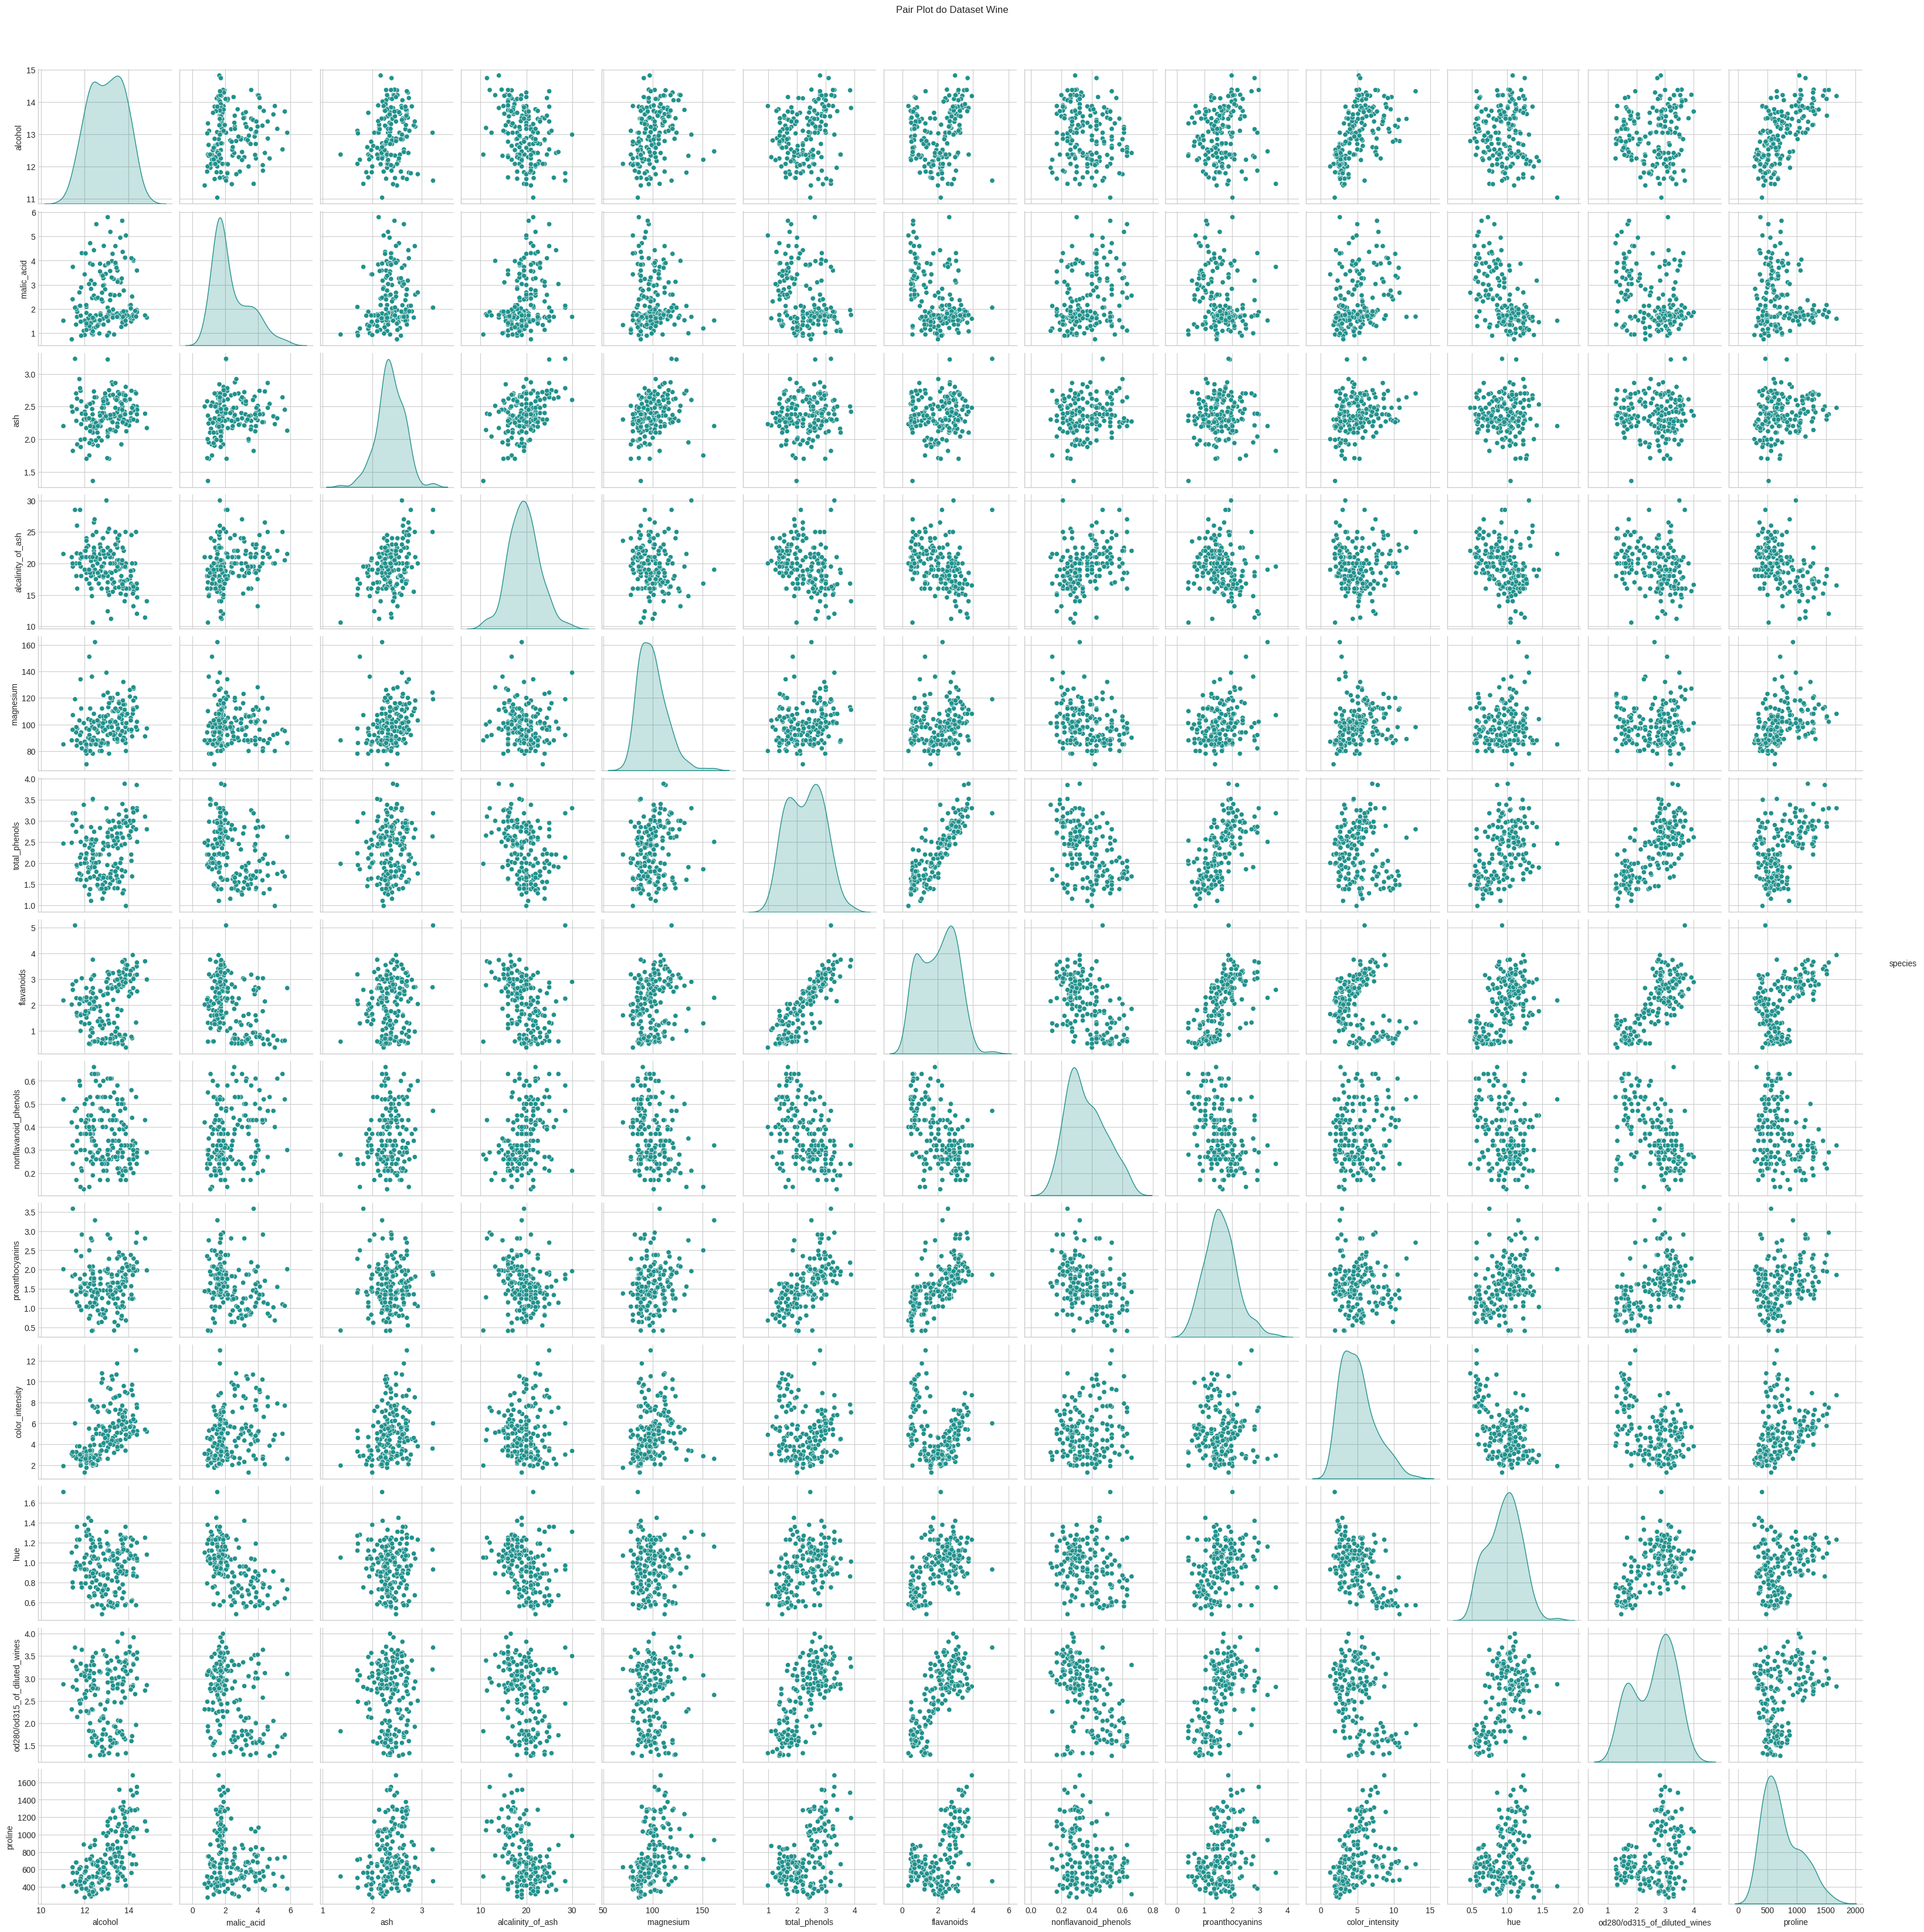

In [12]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster


wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print("Dataset Wine:")
print(f"Shape: {X_wine.shape}")
print(f"Features: {wine.feature_names}")
print(f"Classes: {wine.target_names}")

# 2. Análise das features para seleção
wine_df = pd.DataFrame(X_wine, columns=wine.feature_names)
wine_df['species'] = pd.Series(wine.target).map({0: '', 1: '', 2: ''})

sns.pairplot(wine_df, hue='species', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot do Dataset Wine', y=1.02)
plt.show()



Dataset Wine:
Shape: (178, 13)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


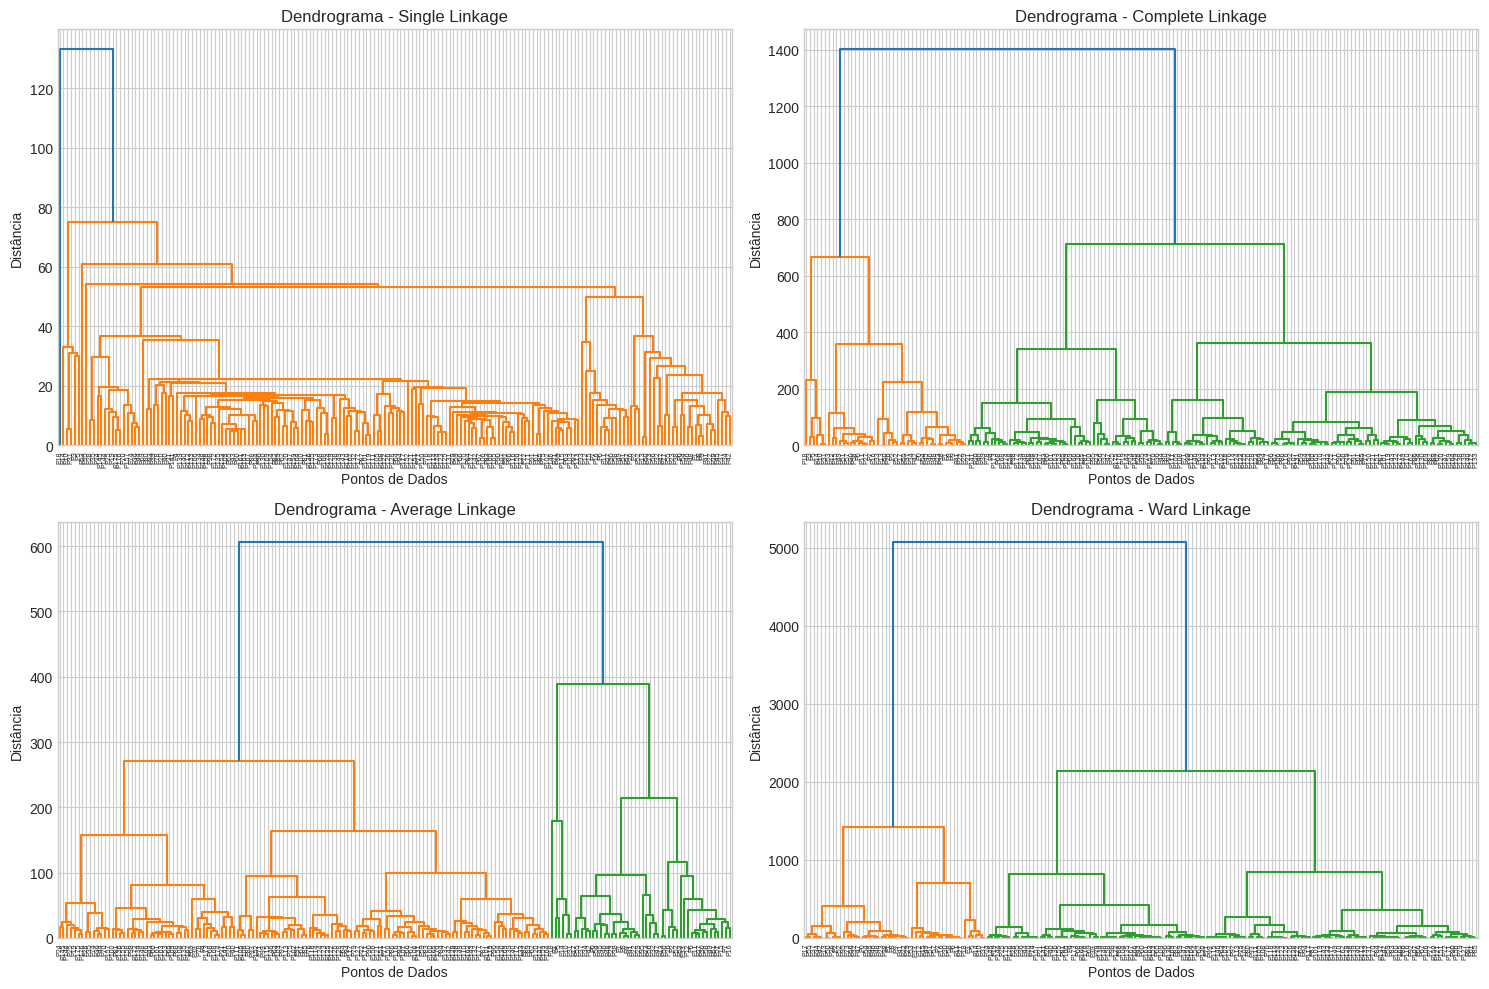

In [ ]:

# 3. Seleção das duas melhores features
X_wine[:, [0, 11]]#pegou todas as linhas , [indices das features]



# 4. Aplicação dos métodos de ligação e criação dos dendrogramas
linkage_methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, method in enumerate(linkage_methods):
    # Calcular a matriz de ligação
    linkage_matrix = linkage(X_wine, method=method)

    # Criar o dendrograma
    dendrogram(linkage_matrix, ax=axes[i], labels=[f'P{j}' for j in range(len(X_wine))])
    axes[i].set_title(f'Dendrograma - {method.capitalize()} Linkage')
    axes[i].set_xlabel('Pontos de Dados')
    axes[i].set_ylabel('Distância')

plt.tight_layout()
plt.show()

# 5. Análise visual e determinação do melhor método
# R: Visualmente determinamos Average Linkage como melhor método pois apresenta o dendrograma com a melhor Distância.

In [ ]:
X_wine[:, [0, 11]]

array([[14.23,  3.92],
       [13.2 ,  3.4 ],
       [13.16,  3.17],
       [14.37,  3.45],
       [13.24,  2.93],
       [14.2 ,  2.85],
       [14.39,  3.58],
       [14.06,  3.58],
       [14.83,  2.85],
       [13.86,  3.55],
       [14.1 ,  3.17],
       [14.12,  2.82],
       [13.75,  2.9 ],
       [14.75,  2.73],
       [14.38,  3.  ],
       [13.63,  2.88],
       [14.3 ,  2.65],
       [13.83,  2.57],
       [14.19,  2.82],
       [13.64,  3.36],
       [14.06,  3.71],
       [12.93,  3.52],
       [13.71,  4.  ],
       [12.85,  3.63],
       [13.5 ,  3.82],
       [13.05,  3.2 ],
       [13.39,  3.22],
       [13.3 ,  2.77],
       [13.87,  3.4 ],
       [14.02,  3.59],
       [13.73,  2.71],
       [13.58,  2.88],
       [13.68,  2.87],
       [13.76,  3.  ],
       [13.51,  2.87],
       [13.48,  3.47],
       [13.28,  2.78],
       [13.05,  2.51],
       [13.07,  2.69],
       [14.22,  3.53],
       [13.56,  3.38],
       [13.41,  3.  ],
       [13.88,  3.56],
       [13.

### Exercício 3: Determinação do Número Ótimo de Clusters

Com base no melhor método de ligação identificado no Exercício 2, determine o número ótimo de clusters para o dataset Wine usando análise visual do dendrograma e validação com os rótulos verdadeiros.

**Tarefas:**
1. Use o melhor método identificado no exercício anterior
2. Crie um dendrograma detalhado com linha de corte ajustável
3. Teste diferentes números de clusters (2, 3, 4, 5) usando `fcluster`
4. Para cada número de clusters, visualize os clusters no scatter plot
5. Determine o número ótimo de clusters justificando sua escolha

Passo inicial: 178 clusters individuais
Clusters: [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [1

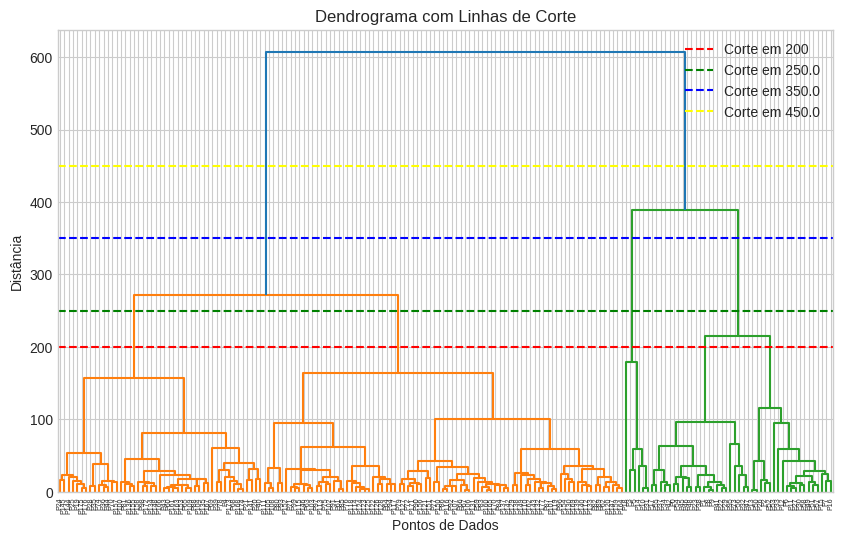

Análise do número ótimo de clusters:


In [27]:
# Exercício 3: Determinação do Número Ótimo de Clusters

# 1. Use o melhor método do exercício anterior
# best_method = 'average linkage'
# Executar a clusterização hierárquica com ligação simples
hc_single = HierarchicalClustering(linkage='single')
hc_single.fit(X_wine)

# 2. Crie dendrograma com diferentes linhas de corte
# Criar o dendrograma
linkage_matrix = linkage(X_wine, method='average')

# Definir diferentes alturas de corte
cut_heights = [200, 250.0, 350.0, 450.0]
colors = ['red', 'green', 'blue', 'yellow']

# Visualizar o dendrograma com diferentes cortes
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=[f'P{j}' for j in range(len(X_wine))])

for height, color in zip(cut_heights, colors):
    plt.axhline(y=height, color=color, linestyle='--', label=f'Corte em {height}')

plt.title('Dendrograma com Linhas de Corte')
plt.xlabel('Pontos de Dados')
plt.ylabel('Distância')
plt.legend()
plt.show()



# Seu código aqui

In [40]:
# 3. Teste diferentes números de clusters
n_clusters_to_test = [2, 3, 4, 5]

print("Predição de clusters para diferentes alturas de corte:")
print("=" * 55)

for i, n_cluster in enumerate(n_clusters_to_test):
    # Obter diferentes números de clusters
    clusters = fcluster(linkage_matrix, n_cluster, criterion='maxclust')
    n_clusters = len(np.unique(clusters))

    print()
 #   print(f"Altura de corte: {n_cluster}")
    print(f"Número de clusters: {n_clusters}")

    # Mostrar quais pontos pertencem a cada cluster
    for cluster_id in np.unique(clusters):
        points = [f"P{j}" for j in range(len(X_wine)) if clusters[j] == cluster_id]
        print(f"  Cluster {cluster_id}: {points}")
    # Visualizar cluster no scatterplot

print("Análise do número ótimo de clusters:")
print("=" * 40)

Predição de clusters para diferentes alturas de corte:

Número de clusters: 2
  Cluster 1: ['P4', 'P19', 'P20', 'P21', 'P24', 'P25', 'P28', 'P35', 'P36', 'P39', 'P40', 'P43', 'P44', 'P59', 'P60', 'P61', 'P62', 'P63', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71', 'P72', 'P74', 'P75', 'P76', 'P77', 'P78', 'P79', 'P80', 'P81', 'P82', 'P83', 'P84', 'P85', 'P86', 'P87', 'P88', 'P89', 'P90', 'P91', 'P92', 'P93', 'P94', 'P96', 'P97', 'P98', 'P99', 'P100', 'P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110', 'P111', 'P112', 'P113', 'P114', 'P115', 'P116', 'P117', 'P118', 'P119', 'P120', 'P121', 'P122', 'P123', 'P124', 'P125', 'P126', 'P127', 'P128', 'P129', 'P130', 'P131', 'P132', 'P133', 'P134', 'P135', 'P136', 'P137', 'P138', 'P139', 'P140', 'P141', 'P142', 'P143', 'P144', 'P145', 'P146', 'P147', 'P148', 'P149', 'P150', 'P151', 'P152', 'P153', 'P154', 'P155', 'P156', 'P157', 'P158', 'P159', 'P160', 'P161', 'P162', 'P163', 'P164', 'P165', 'P166', 'P167', '

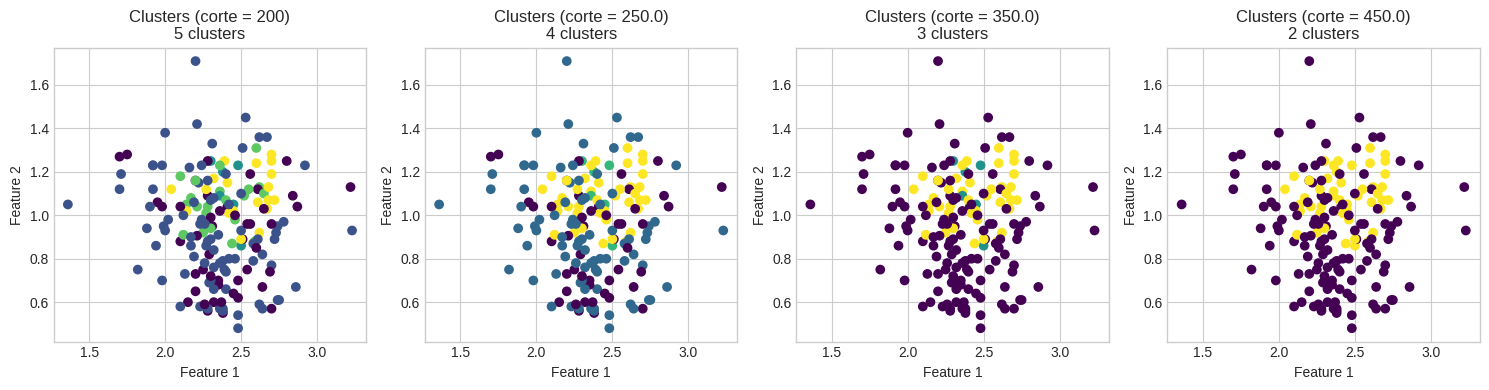

In [41]:
# 4 Para cada número de clusters, visualize os clusters no scatter plot
fig, axes = plt.subplots(1, len(cut_heights), figsize=(15, 4))

for i, height in enumerate(cut_heights):
    clusters = fcluster(linkage_matrix, height, criterion='distance')
    scatter = axes[i].scatter(X_wine[:, 2], X_wine[:, 10], c=clusters, cmap='viridis')

    # Adicionar rótulos dos pontos


    axes[i].set_title(f'Clusters (corte = {height})\n{len(np.unique(clusters))} clusters')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].grid(True)

colors = ['red', 'green', 'blue', 'yellow']
plt.tight_layout()
plt.show()

In [ ]:
# 5 Determine o número ótimo de clusters justificando sua escolha
# R: Com as observações do resultado do teste com a função fcluster no exercício 3 parte 3 e do teste visual do exercício 3 parte 4 afirmamos que:
#    um número ótimo de clusters é 4, porém sabemos que no dataset wine temos 3 classes.